In [1]:
# Árvores de Decisão: Classificação

## Importação das bibliotecas

In [ ]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from scipy import stats

# Módulo de Análise Exploratória
import aed

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importação da base de dados

In [ ]:
df_rh = pd.read_csv('./dados/base_rh.csv',sep=',')
df_rh.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


## Preparação dos Dados

### Missing Values

In [4]:
df_rh.isnull().sum()

Funcionario_Deixou_Empresa    0
Freq_Viagens                  0
Formacao                      0
Estado_Civil                  0
Faz_hora_extras               0
Equilibrio_de_Vida            0
Idade                         0
Tempo_de_empresa              0
dtype: int64

### Duplicações

In [5]:
df_rh.index.duplicated().sum()

0

### Tipos de Variáveis

In [6]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funcionario_Deixou_Empresa  1470 non-null   object
 1   Freq_Viagens                1470 non-null   object
 2   Formacao                    1470 non-null   object
 3   Estado_Civil                1470 non-null   object
 4   Faz_hora_extras             1470 non-null   object
 5   Equilibrio_de_Vida          1470 non-null   object
 6   Idade                       1470 non-null   int64 
 7   Tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

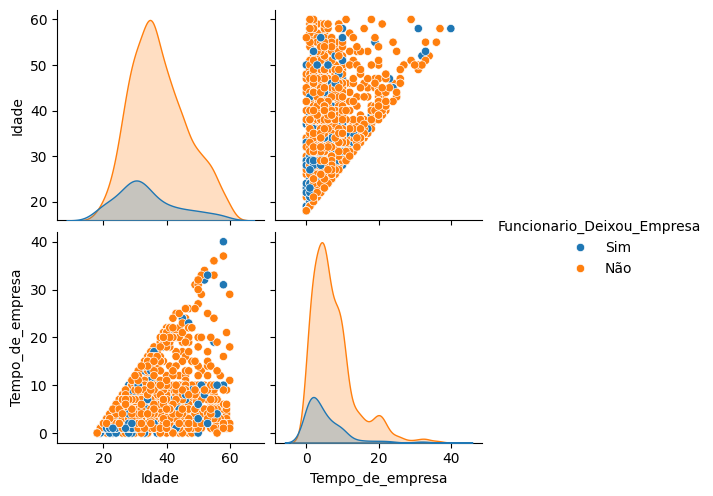

In [7]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df_rh, hue='Funcionario_Deixou_Empresa');

### Information Value - IV

In [8]:
df_rh['Target'] = np.where(df_rh['Funcionario_Deixou_Empresa'] == 'Sim', 1, 0)

df_rh_iv = aed.analise_iv(df_rh, 
                          'Target')
df_rh_iv.get_lista_iv()

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover\aed.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


In [9]:
df_rh_iv.get_bivariada(var_escolhida='Faz_hora_extras')

==> "Faz_hora_extras" tem IV de 0.4


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Faz_hora_extras,Não,110.0,944.0,1054.0,71.7,46.41,76.56,10.44,0.61,-0.49,0.15
1,Faz_hora_extras,Sim,127.0,289.0,416.0,28.3,53.59,23.44,30.53,2.29,0.83,0.25


A proporção de pessoas que saíram da empresa e fazem hora extra é de 2.29, enquanto a proporção de pessoas
que saíram da empresa e não fizeram hora extra é de 0.61.

In [10]:
df_rh_iv.get_bivariada(var_escolhida='Tempo_de_empresa')

==> "Tempo_de_empresa" tem IV de 0.34


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tempo_de_empresa,"(-0.01, 1.0]",75.0,140.0,215.0,14.63,31.65,11.35,34.88,2.79,1.03,0.21
1,Tempo_de_empresa,"(1.0, 2.0]",27.0,100.0,127.0,8.64,11.39,8.11,21.26,1.40,0.34,0.01
2,Tempo_de_empresa,"(2.0, 3.0]",20.0,108.0,128.0,8.71,8.44,8.76,15.62,0.96,-0.04,0.00
3,Tempo_de_empresa,"(3.0, 5.0]",40.0,266.0,306.0,20.82,16.88,21.57,13.07,0.78,-0.25,0.01
4,Tempo_de_empresa,"(5.0, 7.0]",20.0,146.0,166.0,11.29,8.44,11.84,12.05,0.71,-0.34,0.01
5,Tempo_de_empresa,"(7.0, 9.0]",17.0,145.0,162.0,11.02,7.17,11.76,10.49,0.61,-0.49,0.02
6,Tempo_de_empresa,"(9.0, 10.0]",18.0,102.0,120.0,8.16,7.59,8.27,15.00,0.92,-0.08,0.00
7,Tempo_de_empresa,"(10.0, 15.0]",7.0,101.0,108.0,7.35,2.95,8.19,6.48,0.36,-1.02,0.05
8,Tempo_de_empresa,"(15.0, 40.0]",13.0,125.0,138.0,9.39,5.49,10.14,9.42,0.54,-0.62,0.03


==> "Tempo_de_empresa" tem IV de 0.34

### Relatórios Pandas Profiling e SweetViz

In [11]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df_rh,
                                               target_feat='Target')

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover\venv\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 79.91it/s]
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão
Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de *Machine Learning*.

### Definição do *Target* e das *Features*

In [12]:
# Criação das variáveis dummies
df_rh_modelo = pd.get_dummies(df_rh)
df_rh_modelo = df_rh_modelo.astype(int)
df_rh_modelo.head()

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,49,10,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,37,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,33,8,0,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,27,2,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [13]:
# Target (variável resposta)
y = df_rh_modelo['Target']

# Features (variáveis explicativas)
x = df_rh_modelo.drop(['Target',
                       'Funcionario_Deixou_Empresa_Não',
                       'Funcionario_Deixou_Empresa_Sim'
                      ], 
                      axis = 1)

### Treinamento da Árvore de Decisão

In [14]:
modelo_turnover = DecisionTreeClassifier(max_depth=3, 
                                         random_state=42)
modelo_turnover.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Avaliação do modelo treinado

#### Interpretação do Modelo

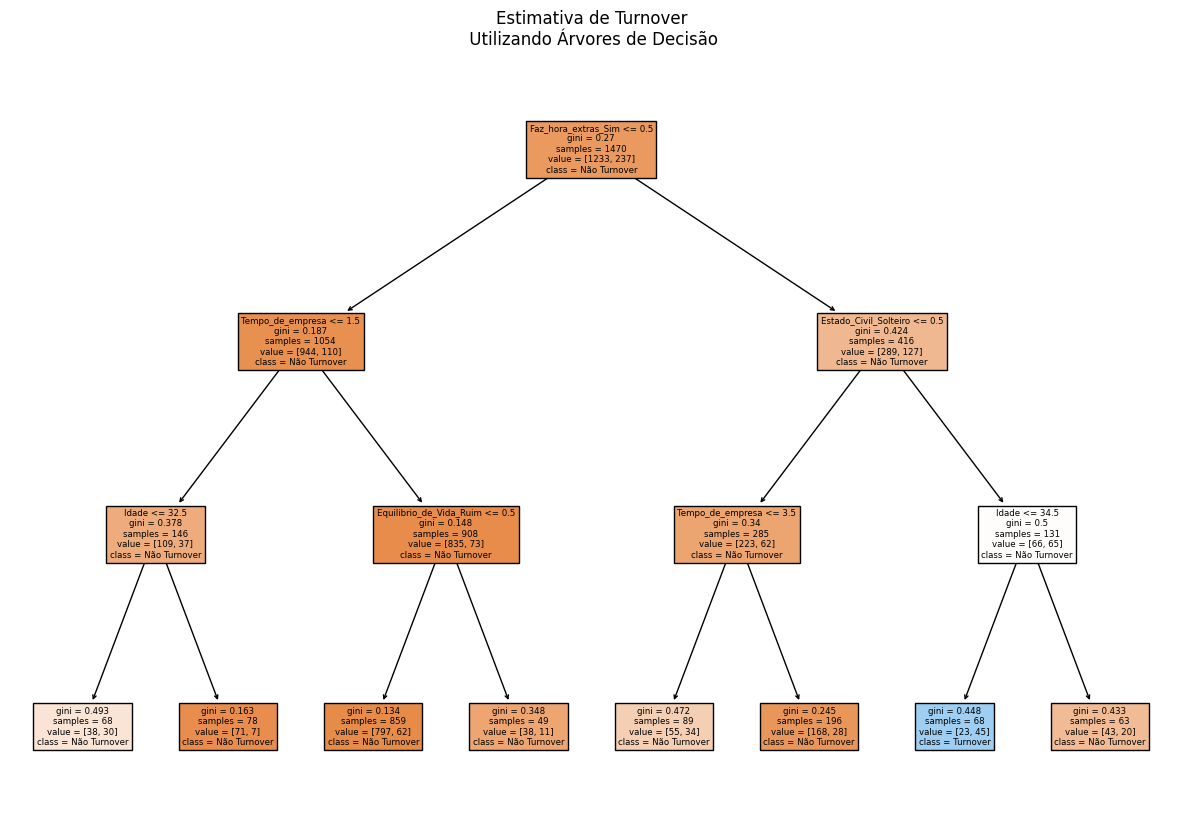

In [15]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_turnover,                             # modelo
               feature_names=features,                      # feature
               class_names=['Não Turnover','Turnover'],     # classe
               filled=True);                                # cores nas caixas
plt.title("Estimativa de Turnover\n Utilizando Árvores de Decisão");

c:\Users\rocki\OneDrive\Documentos\GitHub\Turnover\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


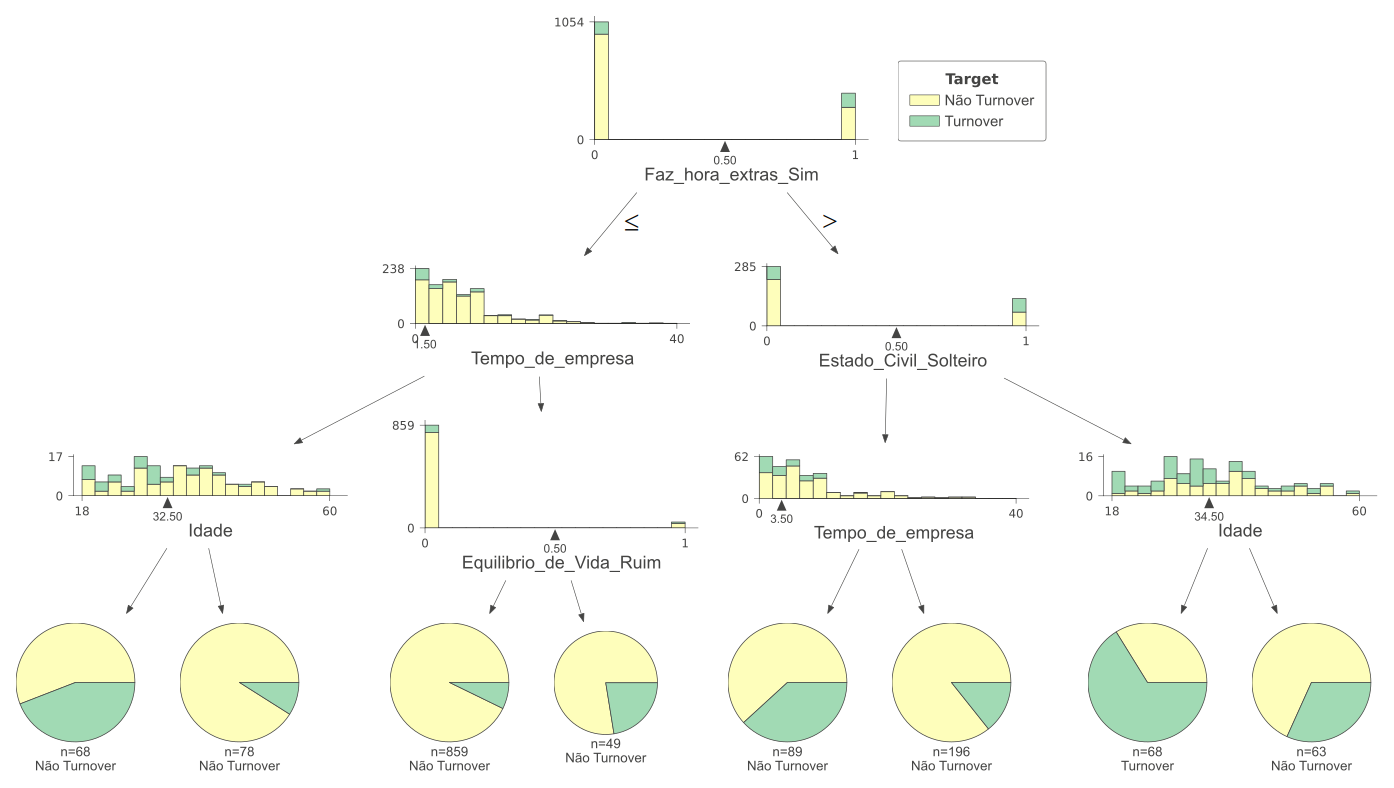

In [16]:
viz = dtreeviz(tree_model=modelo_turnover,
               x_data=x, y_data=y, 
               target_name='Target',
               feature_names=features,
               class_names=['Não Turnover', 'Turnover'], 
               scale=2.0)
viz

#### Desempenho do Modelo

In [17]:
# Separando x e y em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
# Criando e treinando o modelo com os mesmos hiperparâmetros
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
# Fazendo previsões e calculando probabilidades
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade de y = 1

In [20]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[357,  23],
       [ 48,  13]], dtype=int64)

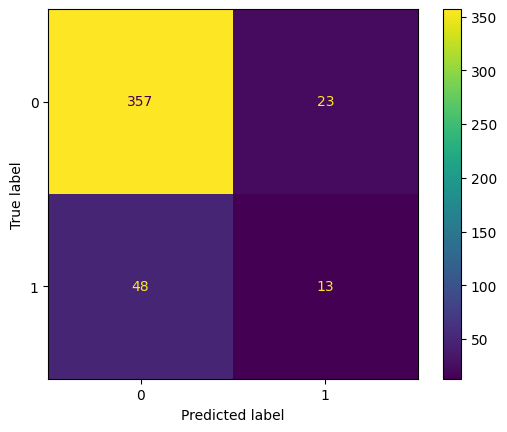

In [21]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

o modelo tem um bom desempenho na classe 0 (como você pode ver no alto recall e precision de 0), mas está tendo dificuldades em prever a classe 1.

In [22]:
# Relatório de Classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       380
           1       0.36      0.21      0.27        61

    accuracy                           0.84       441
   macro avg       0.62      0.58      0.59       441
weighted avg       0.81      0.84      0.82       441



 O precision de 0.36 e recall de 0.21 para a classe 1 indicam que o modelo tem dificuldade em prever corretamente a classe positiva (classe 1). Isso é um sinal de que o modelo pode estar com um viés de classe (mais focado em acertar a classe 0, já que a distribuição das classes não é balanceada).

 A f1-score para a classe 1 está baixa, o que reforça a ideia de que a classe 1 não está sendo bem classificada.
 A acurácia é boa (84%), mas, como você mencionou, a acurácia sozinha pode ser enganosa, especialmente com dados desbalanceados.

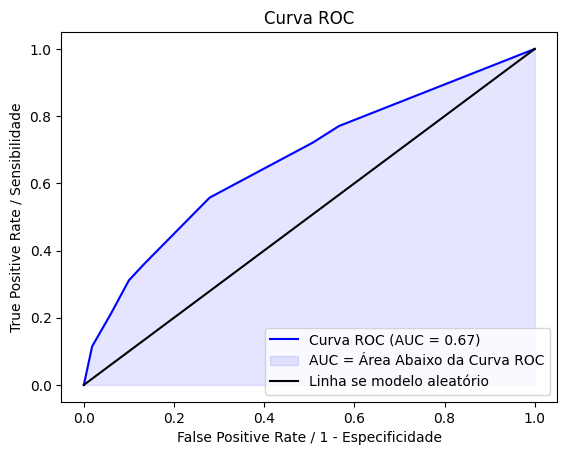

In [23]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Linha se modelo aleatório')
plt.xlabel('False Positive Rate / 1 - Especificidade')
plt.ylabel('True Positive Rate / Sensibilidade')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### o modelo consegue distinguir razoavelmente bem entre as duas classes, mas ainda pode ser melhorado.

In [24]:
ks_data = pd.DataFrame({
    'y_test': y_test,
    'y_prob': y_prob
})

In [25]:
# Separe as probabilidades conforme o valor real de y_test
prob_y_real_0 = ks_data.loc[ks_data['y_test'] == 0, 'y_prob']
prob_y_real_1 = ks_data.loc[ks_data['y_test'] == 1, 'y_prob']

In [26]:
# Agora você pode calcular as distribuições acumuladas e o KS.
from scipy.stats import ks_2samp

# Cálculo do KS
ks_stat, ks_p_value = ks_2samp(prob_y_real_1, prob_y_real_0)

print(f"KS Statistic: {ks_stat:.4f}")
print(f"p-value: {ks_p_value:.4f}")

KS Statistic: 0.2784
p-value: 0.0004


### O valor de 28% para o KS sugere que o modelo tem uma diferença razoável entre as classes em termos de distribuição, mas há espaço para melhorias. 